<a href="https://colab.research.google.com/github/mtir/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification d'images CNN**

Installation des dépendances et  importation des bibliothèques nécessaires

In [ ]:
pip install tensorflow keras numpy skimage matplotlib

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Chargement des données dans les variables

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Affichage de types des données

In [ ]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Tester l'image d'index=0

In [ ]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Affichage de l'image

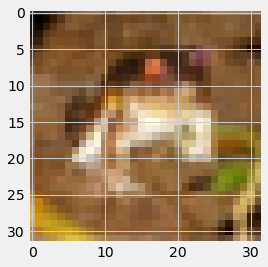

In [ ]:
img = plt.imshow(x_train[index])

In [ ]:
print('The image label is: ', y_train[index])

The image label is:  [6]


La diffréentes classes

In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


l'utilison du one_hot_recording pour convertir les étiquettes en un ensemble de 10 nombres

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Normalisation des pixels des images à une valeur comprise entre 0 et 1, ce sont  des valeurs comprises entre 0 et 255

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**La construction du modèle**

In [ ]:
model = Sequential()

La convolution du modèle

In [ ]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))

Le pooling 

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

la convolution et le pooling une deuxième foix

In [ ]:
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

L'utilisation du fonction flatten

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(1000, activation='relu'))

L'ajout d'un calque de perte

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(500, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(250, activation='relu'))

La fonction softmax

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

Pour compiler le modèle nous avons besoin d’une fonction loss (categorical_crossentropy ) qui est utilisée pour les classes supérieures à 2, d’un optimiseur (adam) et d’une précision(accuracy) du modèle.

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

**L'apprentissage du modèle**

In [ ]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=70, validation_split=0.3 )

Epoch 1/70
137/137 [==============================] - 73s 530ms/step - loss: 2.0227 - accuracy: 0.2310 - val_loss: 1.5028 - val_accuracy: 0.4391
Epoch 2/70
137/137 [==============================] - 70s 515ms/step - loss: 1.4755 - accuracy: 0.4517 - val_loss: 1.2853 - val_accuracy: 0.5390
Epoch 3/70
137/137 [==============================] - 70s 514ms/step - loss: 1.2670 - accuracy: 0.5426 - val_loss: 1.1522 - val_accuracy: 0.5861
Epoch 4/70
137/137 [==============================] - 70s 513ms/step - loss: 1.1190 - accuracy: 0.5979 - val_loss: 1.1003 - val_accuracy: 0.6074
Epoch 5/70
137/137 [==============================] - 71s 517ms/step - loss: 1.0253 - accuracy: 0.6367 - val_loss: 1.0408 - val_accuracy: 0.6317
Epoch 6/70
137/137 [==============================] - 79s 580ms/step - loss: 0.9477 - accuracy: 0.6623 - val_loss: 1.0655 - val_accuracy: 0.6283
Epoch 7/70
137/137 [==============================] - 72s 524ms/step - loss: 0.8716 - accuracy: 0.6941 - val_loss: 0.9921 - val_ac

**L'evaluation du modèle**

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

**La visualisation du modèle **

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Le test du modèle**

pour tester le modèle nous avons entré une image "download" cette image est une image de airplane que nous avons dans motre pc donc si nous veulons changer l'image de test il suffit de donner le meme non que nous veulons entré comme image avec la new_image

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
new_image = plt.imread("download.jpg") #Read in the image (3, 14, 20)

La prédiction 

In [ ]:
predictions = model.predict(np.array( [resized_image] ))

In [ ]:
predictions

La classification de l'image selon les 5 probabilités plus compatibles

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

In [ ]:
#To save this model 
model.save('my_model.h5')

In [ ]:
#To load this model
from keras.models import load_model
model = load_model('my_model.h5')